In [67]:
import pandas as pd
import numpy as np

# from sklearn.utils import shuffle

# Model training
#from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

#from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_pickle('merged_df.pkl.gz', compression='gzip')
df.head()

,name_length,avg_token_length,num_tokens,period_freq,dash_freq,apostrophe_freq,space_freq,unigrams_cosine_sim,bigrams_cosine_sim,accent_count,language
0,9,9.0,1,0,0,0,0,0.664809,0.250640,0,Indonesian
1,12,12.0,1,0,0,0,0,0.686625,0.353292,0,Indonesian
2,8,8.0,1,0,0,0,0,0.688312,0.197139,0,Indonesian
3,9,9.0,1,0,0,0,0,0.581396,0.155386,0,Indonesian
4,8,8.0,1,0,0,0,0,0.463215,0.176917,0,Indonesian


In [3]:
X = df.drop(columns = 'language', axis = 1)
y = df['language']

In [4]:
# Split data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 524)

# Creating the model
rf_model = RandomForestClassifier()

# Hyperparameter tuning
param_dist = {
    'n_estimators': np.arange(50, 500, 50), # replaced [50, 100, 200, 300]
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 7, 10, 12, 15],
    'min_samples_leaf': [1, 2, 4, 7, 10],
    'bootstrap': [True, False]
}

In [5]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions = param_dist, n_iter = 30, cv = 3, random_state = 524)

# Fit the model on the training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4, 7, 10],
                                        'min_samples_split': [2, 5, 7, 10, 12,
                                                              15],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=524)

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_depth', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


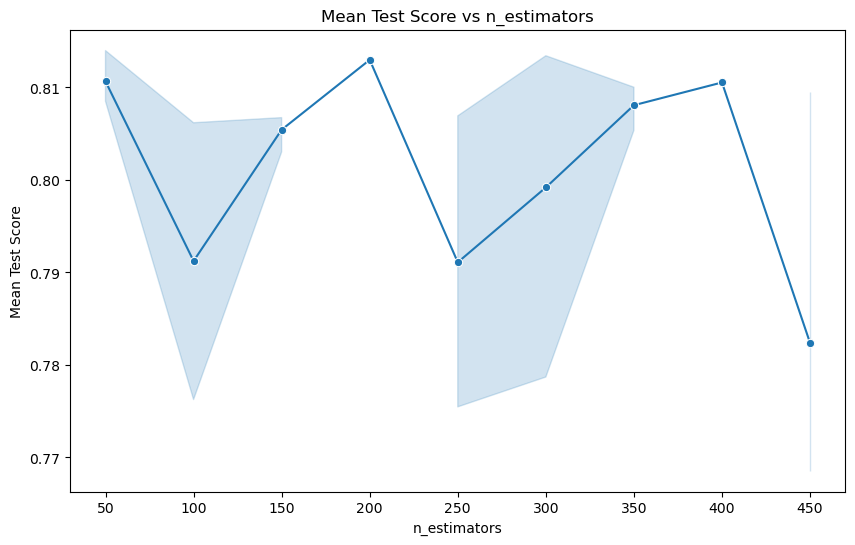

In [51]:
rf_results = random_search.cv_results_
print(rf_results.keys())

# Plot n_estimators vs mean test score
plt.figure(figsize = (10, 6))
sns.lineplot(x = rf_results['param_n_estimators'], y = rf_results['mean_test_score'], marker = 'o')
plt.title('Mean Test Score vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.show()

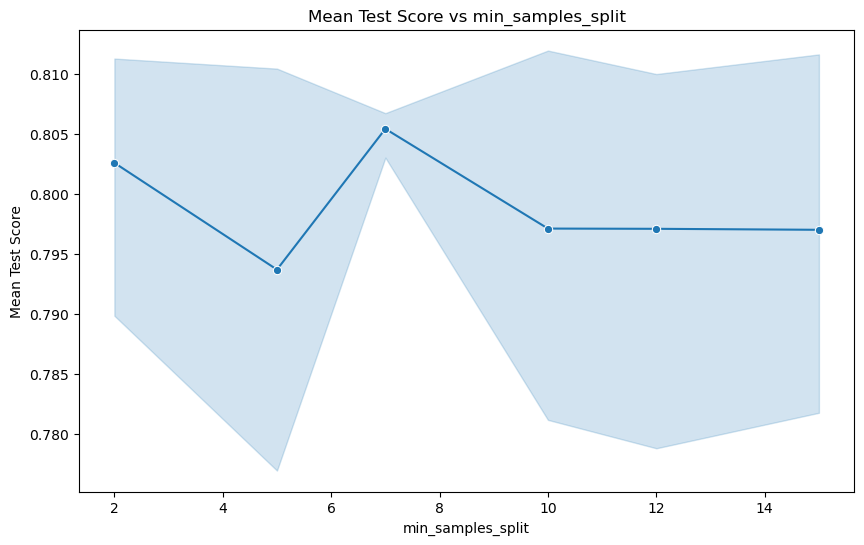

In [70]:
# Plot n_estimators vs mean test score
plt.figure(figsize = (10, 6))
sns.lineplot(x = rf_results['param_min_samples_split'], y = rf_results['mean_test_score'], marker = 'o')
plt.title('Mean Test Score vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Test Score')
plt.show()

In [69]:
# # as a bar chart
# plt.figure(figsize = (10, 6))
# # color_palette = sns.color_palette('', n_colors = len(rf_results['mean_test_score']))
# palette = sns.color_palette('coolwarm', len(rf_results['mean_test_score']))
# # rank = rf_results['mean_test_score'].argsort()
# # print(rf_results['mean_test_score'])
# # print(rank)
# # rank = sorted(rf_results['mean_test_score'])
# sns.barplot(x = rf_results['param_n_estimators'], y = rf_results['mean_test_score'], palette = palette)
# plt.title('Mean Test Score vs n_estimators')
# plt.xlabel('n_estimators')
# plt.ylabel('Mean Test Score')
# plt.show()

In [55]:
# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Step 9: Evaluate on Validation Set
# Predict on the validation set
y_train_pred = random_search.predict(X_train)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Training Accuracy: 0.8914030898191919


from previous:

Best Hyperparameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
Validation Accuracy: 0.842227686582043

In [57]:
print(classification_report(y_train, y_train_pred))

                       precision    recall  f1-score   support

   Arabic (Romanized)       0.83      0.17      0.28       732
 Chinese (Characters)       0.88      0.95      0.91      7321
  Chinese (Romanized)       0.79      0.81      0.80      7263
             Croatian       0.85      0.46      0.60       387
                Dutch       0.83      0.13      0.22       479
              English       0.68      0.94      0.79     16069
               French       0.74      0.24      0.36       843
               German       0.92      0.12      0.21       748
    Hindi (Romanized)       0.93      0.13      0.23       536
           Indonesian       0.69      0.62      0.66      7819
              Italian       0.80      0.16      0.27       844
Japanese (Characters)       0.97      0.97      0.97     63990
 Japanese (Romanized)       0.91      0.99      0.94     64839
  Korean (Characters)       0.99      0.99      0.99      6554
   Korean (Romanized)       0.96      0.86      0.91  

In [56]:
y_test_pred = random_search.predict(X_test)

# Evaluate performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8171800907447208


In [60]:
print(classification_report(y_test, y_test_pred))

                       precision    recall  f1-score   support

   Arabic (Romanized)       0.37      0.06      0.10       314
 Chinese (Characters)       0.79      0.85      0.82      3165
  Chinese (Romanized)       0.62      0.62      0.62      3215
             Croatian       0.39      0.11      0.18       195
                Dutch       0.58      0.05      0.09       216
              English       0.55      0.81      0.66      6708
               French       0.27      0.06      0.10       321
               German       0.20      0.01      0.01       316
    Hindi (Romanized)       0.25      0.00      0.01       245
           Indonesian       0.39      0.30      0.34      3412
              Italian       0.06      0.01      0.01       363
Japanese (Characters)       0.96      0.96      0.96     27562
 Japanese (Romanized)       0.85      0.95      0.90     27789
  Korean (Characters)       0.97      0.98      0.97      2757
   Korean (Romanized)       0.93      0.81      0.86  

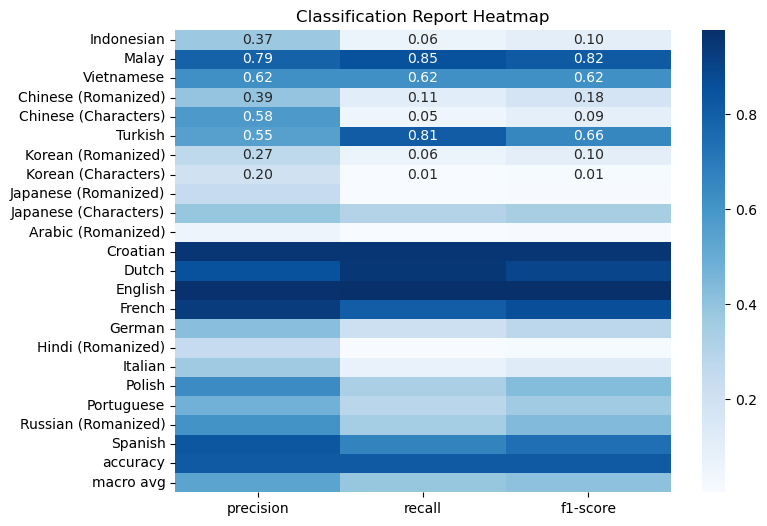

In [68]:
test_report = classification_report(y_test, y_test_pred, target_names = y.unique(), output_dict = True)

# Convert the classification report to a DataFrame for better visualization
test_report_df = pd.DataFrame(test_report).transpose()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(test_report_df.iloc[:-1, :-1], annot = True, cmap = "Blues", fmt = ".2f")
plt.title('Classification Report Heatmap')
plt.show()

### RF GRIDSEARCHCV (HAVENT RAN YET)

In [30]:
rf_param_grid = {
    'n_estimators': [220, 230, 240],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid = rf_param_grid, scoring = 'accuracy', cv = 5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2],
                         'n_estimators': [220, 230, 240]},
             scoring='accuracy')

In [31]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 240}


In [34]:
# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8423606034425467


In [37]:
print(classification_report(y_test, y_test_pred))

                      precision    recall  f1-score   support

Chinese (Characters)       0.79      0.90      0.84      2292
 Chinese (Romanized)       0.69      0.76      0.72      2052
          Indonesian       0.72      0.79      0.76      2229
              Korean       0.94      0.90      0.92      3780
               Malay       0.55      0.24      0.33       602
             Turkish       1.00      0.99      0.99      3625
          Vietnamese       0.60      0.33      0.43       467

            accuracy                           0.84     15047
           macro avg       0.75      0.70      0.71     15047
        weighted avg       0.84      0.84      0.84     15047



### NAIVE BAYES (weird)

In [18]:
# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [19]:
# Make predictions on the testing data
#y_pred = nb_classifier.predict(X_test)
y_pred = nb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
nb_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", nb_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5863627301123148

Classification Report:
                       precision    recall  f1-score   support

Chinese (Characters)       0.69      0.78      0.73      2292
 Chinese (Romanized)       0.00      0.00      0.00      2052
          Indonesian       0.72      0.04      0.07      2229
              Korean       0.95      0.89      0.92      3780
               Malay       0.67      0.01      0.03       602
             Turkish       0.41      0.99      0.58      3625
          Vietnamese       0.00      0.00      0.00       467

            accuracy                           0.59     15047
           macro avg       0.49      0.39      0.33     15047
        weighted avg       0.57      0.59      0.49     15047



/Users/stefh/Documents/bttai/exiger/project_repo/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stefh/Documents/bttai/exiger/project_repo/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stefh/Documents/bttai/exiger/project_repo/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

### logistic regression

In [22]:
X = df.drop(columns = 'language', axis = 1)
y = df['language']

# Split data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
lr_model = LogisticRegression()

# Define the hyperparameter search space
param_dist = {
    'C': loguniform(1e-3, 1e3),
    'penalty': ['l1', 'l2'],
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(lr_model, param_distributions=param_dist, n_iter = 10, scoring='accuracy', cv = 5, random_state = 42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

/Users/stefh/Documents/bttai/exiger/project_repo/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stefh/Documents/bttai/exiger/project_repo/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x14b4ef490>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='accuracy')

In [25]:
# Get the best hyperparameters
best_params = random_search.best_params_

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("Test Accuracy of Best Model:", accuracy)

Best Hyperparameters: {'C': 17.71884735480682, 'penalty': 'l2'}
Test Accuracy of Best Model: 0.7672625772579251


In [26]:
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                       precision    recall  f1-score   support

Chinese (Characters)       0.73      0.88      0.80      2292
 Chinese (Romanized)       0.62      0.64      0.63      2052
          Indonesian       0.72      0.61      0.66      2229
              Korean       0.95      0.89      0.92      3780
               Malay       0.53      0.12      0.20       602
             Turkish       0.75      0.94      0.83      3625
          Vietnamese       0.12      0.01      0.02       467

            accuracy                           0.77     15047
           macro avg       0.63      0.58      0.58     15047
        weighted avg       0.75      0.77      0.75     15047



### GRADIENT BOOSTING

In [28]:
# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(gb_classifier, param_distributions = param_dist, n_iter = 10, scoring='accuracy', cv = 5, random_state = 42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Get the best hyperparameters
best_params = random_search.best_params_

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("Test Accuracy of Best Model:", accuracy)

In [ ]:
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))